In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import json
import pandas as pd
import re
import copy

In [2]:
with open("rawHD_params.json", "r") as f: 
    params = json.load(f)

print(params.keys())

dict_keys(['dataset_directory', 'NUM_INPUT', 'NUM_HIDDEN', 'NUM_OUTPUT', 'BATCH_SIZE', 'INPUT_FRAME_TIMESTEP', 'INPUT_SCALE', 'NETWORK_SCALE', 'NUM_EPOCH', 'NUM_FRAMES', 'verbose', 'debug', 'record_all_hidden_spikes', 'lr', 'lr_decay', 'lr_decay_rate', 'dt', 'reg_lambda_lower', 'reg_lambda_upper', 'reg_nu_upper', 'recurrent', 'evaluate', 'input_hidden_w_mean', 'input_hidden_w_sd', 'hidden_hidden_w_mean', 'hidden_hidden_w_sd', 'hidden_output_w_mean', 'hidden_output_w_sd', 'aug_combine_images', 'aug_swap_pixels', 'aug_swap_pixels_kSwap', 'aug_swap_pixels_pSwap', 'aug_swap_pixels_tSwap', 'cross_validation', 'cross_validation_run_all', 'sweeping_suffix', 'output_dir', 'model_description', 'num_samples'])


In [3]:
os.listdir("/its/home/ts468/data/rawSC/rawSC_80input")

['training_x_data.npy',
 'validation_y_data.npy',
 'validation_x_data.npy',
 'testing_x_data.npy',
 'training_y_data.npy',
 'testing_y_data.npy']

In [4]:
x_train = np.load("/its/home/ts468/data/rawSC/rawSC_80input/training_x_data.npy")

In [5]:
x_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_x_spikes.npy", allow_pickle = True)
y_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_y_spikes.npy", allow_pickle = True)


In [6]:
def augmentation_y_shift(array_x, 
                         array_y, 
                         shift_value = np.random.randint(-5, 5), 
                         x_lim = 1000,
                         percentage_added = 0.5, 
                         percentage_skipped = 0.2):
    """_summary_

    Args:
        array_x (_type_): _description_
        array_y (_type_): _description_
        shift_value (_type_, optional): _description_. Defaults to np.random.randint(-5, 5).
        percentage_added (float, optional): How much of array_x gets shifted. Defaults to 0.5.
        percentage_skipped (float, optional): How much of array_x does not get augmented. Defaults to 0.5.
    """
    
    #focusing on skipped only.
    new_image_array = copy.deepcopy(array_x)
    for trial in new_image_array:
        if np.random.rand() < percentage_skipped: continue
        trial["t"] += np.random.randint(-5, 5)
        trial = np.delete(trial, 
                            list(np.where(x_train[0]["t"] > x_lim)[0]) + \
                            list(np.where(x_train[0]["t"] < 0)[0]))
            
    return array_x, array_y
            
            
    
augmentation_y_shift(x_train, y_train)

(array([array([(67,  48, 1), (77,  52, 1), (61,  53, 1), (76,  55, 1),
               (78,  55, 1), (75,  56, 1), (62,  57, 1), (74,  60, 1),
               (72,  62, 1), (68,  63, 1), (70,  65, 1), (71,  65, 1),
               (69,  68, 1), (73,  71, 1), (44,  73, 1), (66,  73, 1),
               (63,  77, 1), (53,  87, 1), (52,  89, 1), (61,  92, 1),
               (62,  93, 1), (51,  99, 1), (54, 103, 1), ( 5, 104, 1),
               ( 6, 105, 1), (12, 106, 1), (50, 106, 1), (11, 107, 1),
               (49, 107, 1), ( 7, 108, 1), ( 4, 109, 1), (67, 111, 1),
               (13, 112, 1), (47, 113, 1), (45, 115, 1), (10, 116, 1),
               (55, 116, 1), (68, 116, 1), (46, 117, 1), (48, 117, 1),
               (60, 121, 1), (52, 123, 1), (53, 123, 1), ( 9, 124, 1),
               (65, 124, 1), (56, 129, 1), (69, 129, 1), (63, 130, 1),
               (70, 130, 1), ( 5, 131, 1), (44, 132, 1), (11, 133, 1),
               ( 6, 134, 1), (12, 134, 1), (66, 134, 1), (62, 136, 1),
      

Text(0.5, 1.0, 'scale x')

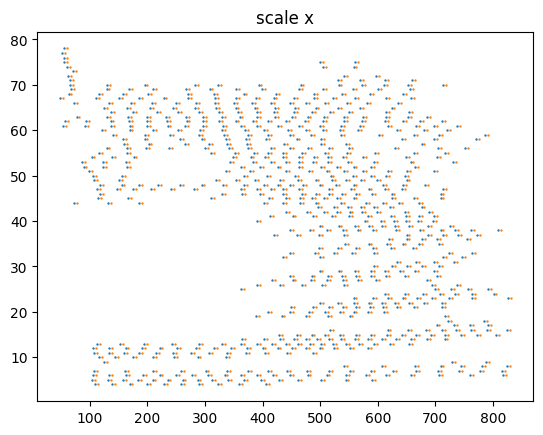

In [7]:
x_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_x_spikes.npy", allow_pickle = True)
y_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_y_spikes.npy", allow_pickle = True)

for spike in x_train[0]:
    plt.scatter(spike[1], spike[0], c = "C0", s = 0.5)
    
x_train[0]["t"] += 5
x_train[0] = np.delete(x_train[0], 
                       list(np.where(x_train[0]["t"] > 1000)[0]) + \
                       list(np.where(x_train[0]["t"] < 0)[0]))

for spike in x_train[0]:
    plt.scatter(spike[1], spike[0], c = "C1", s = 0.5)
    
plt.title("scale x")

Text(0.5, 1.0, 'scale x')

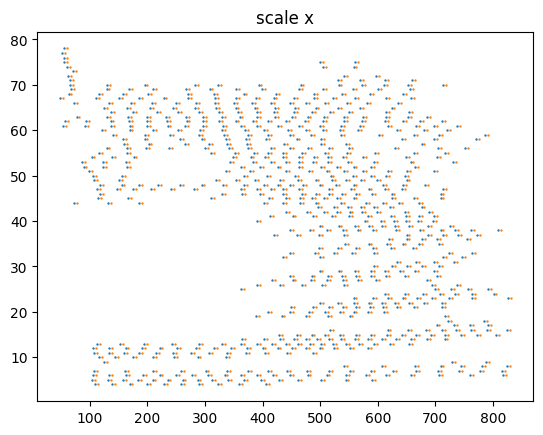

In [8]:
x_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_x_spikes.npy", allow_pickle = True)

for spike in x_train[0]:
    plt.scatter(spike[1], spike[0], c = "C0", s = 0.5)
    
x_train[0]["t"] += 5
x_train[0] = np.delete(x_train[0], 
                       list(np.where(x_train[0]["t"] > 1000)[0]) + \
                       list(np.where(x_train[0]["t"] < 0)[0]))

for spike in x_train[0]:
    plt.scatter(spike[1], spike[0], c = "C1", s = 0.5)
    
plt.title("scale x")

Text(0.5, 1.0, 'scale y')

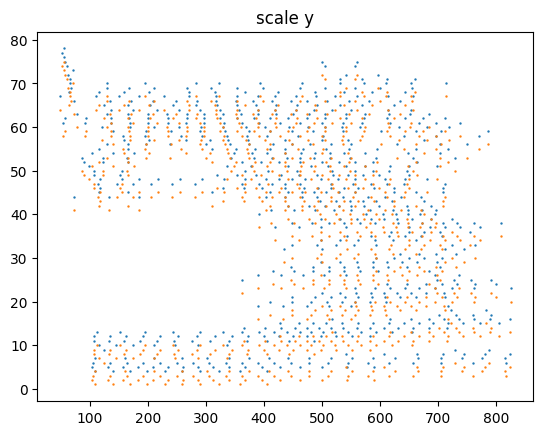

In [9]:
x_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_x_spikes.npy", allow_pickle = True)

for spike in x_train[0]:
    plt.scatter(spike[1], spike[0], c = "C0", s = 0.5)
    
x_train[0]["x"] += -3
x_train[0] = np.delete(x_train[0], 
                       list(np.where(x_train[0]["x"] > 80)[0]) + \
                       list(np.where(x_train[0]["x"] < 0)[0]))

for spike in x_train[0]:
    plt.scatter(spike[1], spike[0], c = "C1", s = 0.5)
    
plt.title("scale y")

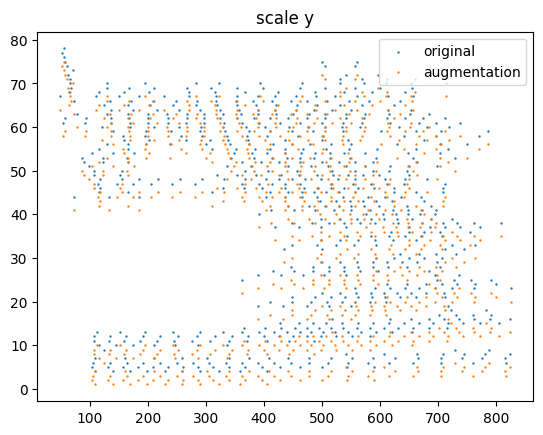

In [10]:
x_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_x_spikes.npy", allow_pickle = True)

plt.scatter(x_train[0]["t"], x_train[0]["x"], c = "C0", s = 0.5, label = "original")
    
x_train[0]["x"] += -3
x_train[0] = np.delete(x_train[0], 
                       list(np.where(x_train[0]["x"] > 80)[0]) + \
                       list(np.where(x_train[0]["x"] < 0)[0]))

plt.scatter(x_train[0]["t"], x_train[0]["x"], c = "C1", s = 0.5, label = "augmentation")
    
plt.title("scale y")

plt.legend()
plt.show()

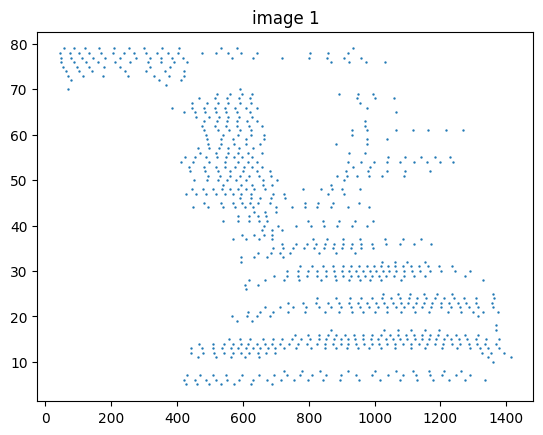

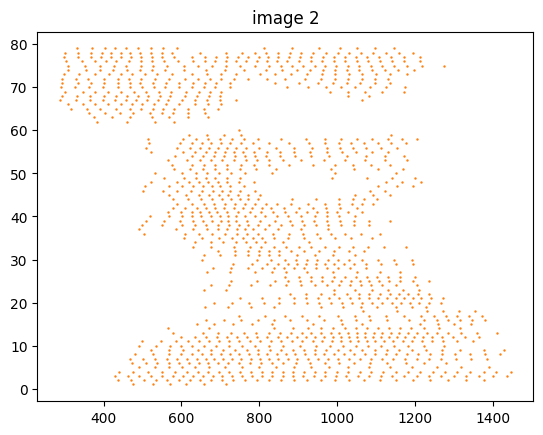

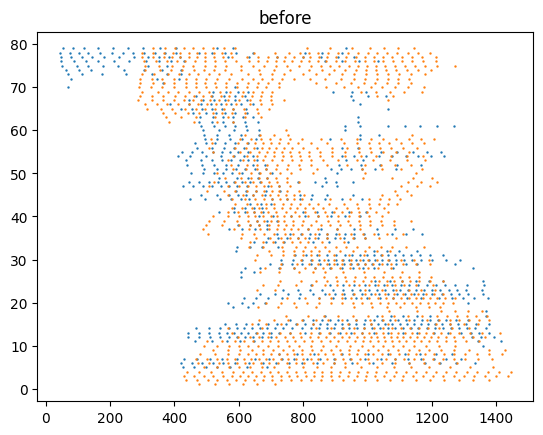

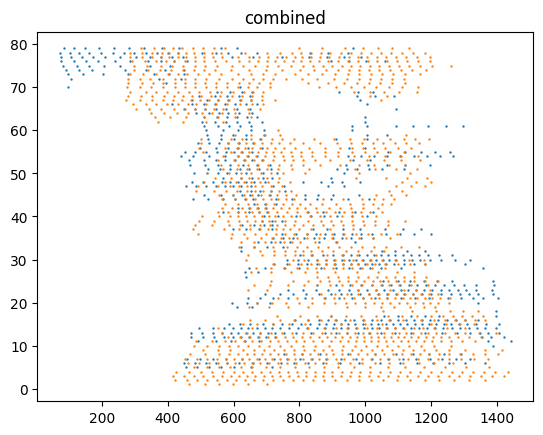

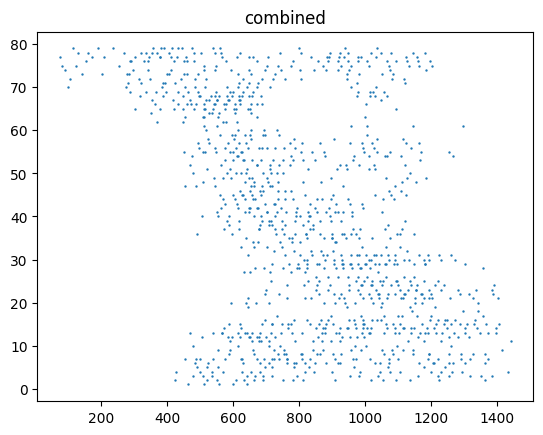

In [11]:
x_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_x_spikes.npy", allow_pickle = True)
y_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_y_spikes.npy", allow_pickle = True)

image_1_id = np.where(y_train == 0)[0][10]
image_2_id = np.where(y_train == 0)[0][70]

plt.scatter(x_train[image_1_id]["t"], x_train[image_1_id]["x"], c = "C0", s = 0.5, label = "img1")
plt.title("image 1")
plt.show()

plt.scatter(x_train[image_2_id]["t"], x_train[image_2_id]["x"], c = "C1", s = 0.5, label = "img2")
plt.title("image 2")
plt.show()

plt.scatter(x_train[image_1_id]["t"], x_train[image_1_id]["x"], c = "C0", s = 0.5, label = "img1")
plt.scatter(x_train[image_2_id]["t"], x_train[image_2_id]["x"], c = "C1", s = 0.5, label = "img2")
plt.title("before")
plt.show()
    
x_train[image_1_id]["t"] -= int((np.sum(x_train[image_1_id]["t"]) / x_train[image_1_id]["t"].shape[0] - np.sum(x_train[image_2_id]["t"]) / x_train[image_2_id]["t"].shape[0]) / 2)
x_train[image_2_id]["t"] += int((np.sum(x_train[image_1_id]["t"]) / x_train[image_1_id]["t"].shape[0] - np.sum(x_train[image_2_id]["t"]) / x_train[image_2_id]["t"].shape[0]) / 2)

x_train[image_1_id] = np.delete(x_train[image_1_id], 
                       list(np.where(x_train[image_1_id]["t"] > 1600)[0]) + \
                       list(np.where(x_train[image_1_id]["t"] < 0)[0]))
x_train[image_2_id] = np.delete(x_train[image_2_id], 
                       list(np.where(x_train[image_2_id]["t"] > 1600)[0]) + \
                       list(np.where(x_train[image_2_id]["t"] < 0)[0]))

plt.scatter(x_train[image_1_id]["t"], x_train[image_1_id]["x"], c = "C0", s = 0.5, label = "augmentation")
plt.scatter(x_train[image_2_id]["t"], x_train[image_2_id]["x"], c = "C1", s = 0.5, label = "img2")
    
plt.title("combined")
plt.show()

plt.scatter(x_train[image_1_id]["t"][1::2], x_train[image_1_id]["x"][1::2], c = "C0", s = 0.5, label = "augmentation")
plt.scatter(x_train[image_2_id]["t"][1::2], x_train[image_2_id]["x"][1::2], c = "C0", s = 0.5, label = "img2")

plt.title("combined")
plt.show()

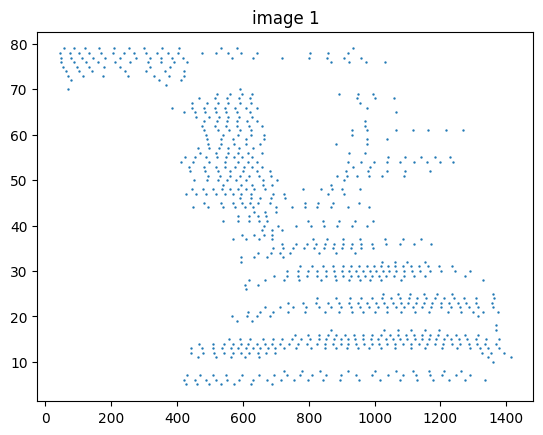

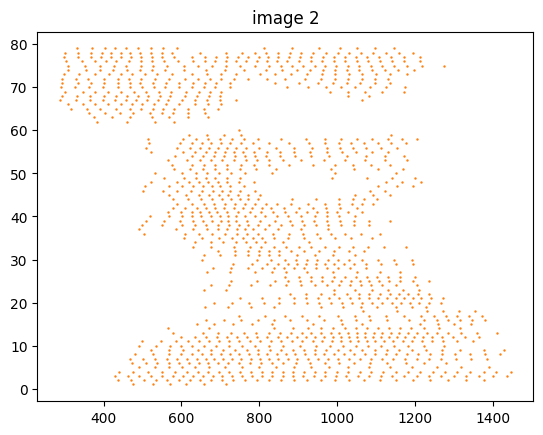

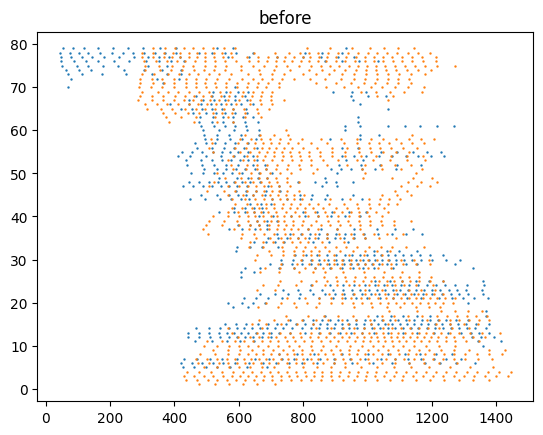

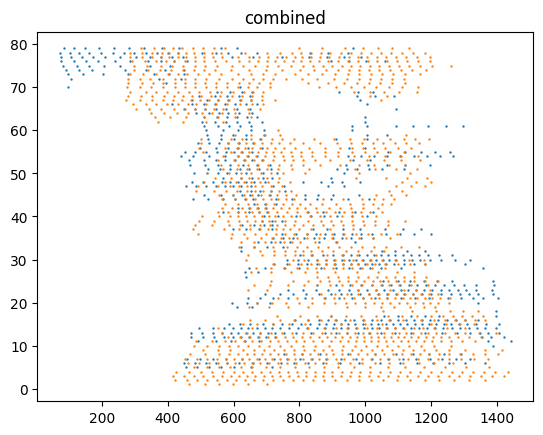

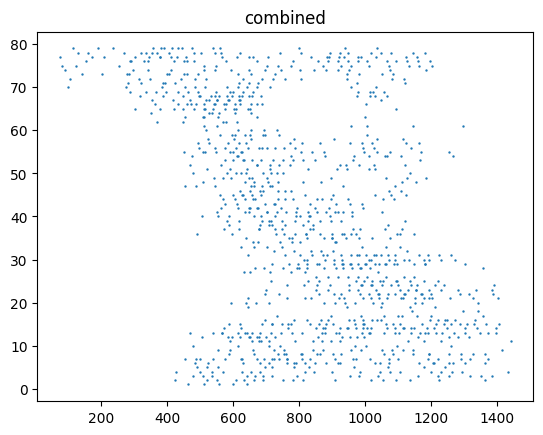

In [12]:
x_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_x_spikes.npy", allow_pickle = True)
y_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_y_spikes.npy", allow_pickle = True)

image_1_id = np.where(y_train == 0)[0][10]
image_2_id = np.where(y_train == 0)[0][70]

plt.scatter(x_train[image_1_id]["t"], x_train[image_1_id]["x"], c = "C0", s = 0.5, label = "img1")
plt.title("image 1")
plt.show()

plt.scatter(x_train[image_2_id]["t"], x_train[image_2_id]["x"], c = "C1", s = 0.5, label = "img2")
plt.title("image 2")
plt.show()

plt.scatter(x_train[image_1_id]["t"], x_train[image_1_id]["x"], c = "C0", s = 0.5, label = "img1")
plt.scatter(x_train[image_2_id]["t"], x_train[image_2_id]["x"], c = "C1", s = 0.5, label = "img2")
plt.title("before")
plt.show()
    
x_train[image_1_id]["t"] -= int((np.sum(x_train[image_1_id]["t"]) / x_train[image_1_id]["t"].shape[0] - np.sum(x_train[image_2_id]["t"]) / x_train[image_2_id]["t"].shape[0]) / 2)
x_train[image_2_id]["t"] += int((np.sum(x_train[image_1_id]["t"]) / x_train[image_1_id]["t"].shape[0] - np.sum(x_train[image_2_id]["t"]) / x_train[image_2_id]["t"].shape[0]) / 2)

x_train[image_1_id] = np.delete(x_train[image_1_id], 
                       list(np.where(x_train[image_1_id]["t"] > 1600)[0]) + \
                       list(np.where(x_train[image_1_id]["t"] < 0)[0]))
x_train[image_2_id] = np.delete(x_train[image_2_id], 
                       list(np.where(x_train[image_2_id]["t"] > 1600)[0]) + \
                       list(np.where(x_train[image_2_id]["t"] < 0)[0]))

plt.scatter(x_train[image_1_id]["t"], x_train[image_1_id]["x"], c = "C0", s = 0.5, label = "augmentation")
plt.scatter(x_train[image_2_id]["t"], x_train[image_2_id]["x"], c = "C1", s = 0.5, label = "img2")
    
plt.title("combined")
plt.show()

plt.scatter(x_train[image_1_id]["t"][1::2], x_train[image_1_id]["x"][1::2], c = "C0", s = 0.5, label = "augmentation")
plt.scatter(x_train[image_2_id]["t"][1::2], x_train[image_2_id]["x"][1::2], c = "C0", s = 0.5, label = "img2")

plt.title("combined")
plt.show()

In [34]:
def merge_and_return_a_new(array_x,
                           array_y,
                           x_lim = 1600,
                           y_lim = 80,
                           percentage_added = 0.5):
    """Augmentation for combining two images and returning a 'merged' combined dataset

    Args:
        array_x (_type_): spike array (formatted as a [[(x, t, p)...spike times...]...array....])
        array_y (_type_): y label for array x
        x_lim (int, optional): x limit for neuron range within layer. Defaults to 1600.
        y_lim (int, optional): y limit for spike time range within trial. Defaults to 80.
        percentage_added (float, optional): how many new merged images are appended to dataset, 50% = 50% increase when returned. Defaults to 0.5.
    """
    
    new_array_x = copy.deepcopy(array_x)
    new_array_y = copy.deepcopy(array_y)
    
    appended_array_x = []
    appended_array_y = []
    
    # loop through all categories
    for category in np.unique(y_train):
        
        for i in range(int(np.where(new_array_y == category)[0].shape[0] * percentage_added)):
            image_1_id, image_2_id = 0, 0
            while image_1_id == image_2_id:
                image_1_id = np.where(new_array_y == category)[0][np.random.randint(0, np.where(new_array_y == category)[0].shape[0])]
                image_2_id = np.where(new_array_y == category)[0][np.random.randint(0, np.where(new_array_y == category)[0].shape[0])]
                
            new_array_x[image_1_id]["t"] -= int((np.sum(new_array_x[image_1_id]["t"]) / 
                                                 new_array_x[image_1_id]["t"].shape[0] - np.sum(new_array_x[image_2_id]["t"]) / 
                                                 new_array_x[image_2_id]["t"].shape[0]) / 2)
            
            new_array_x[image_2_id]["t"] += int((np.sum(new_array_x[image_1_id]["t"]) / 
                                                 new_array_x[image_1_id]["t"].shape[0] - np.sum(new_array_x[image_2_id]["t"]) / 
                                                 new_array_x[image_2_id]["t"].shape[0]) / 2)

            new_array_x[image_1_id] = np.delete(new_array_x[image_1_id], 
                                list(np.where(new_array_x[image_1_id]["t"] > x_lim)[0]) + \
                                list(np.where(new_array_x[image_1_id]["t"] < 0)[0]))
            new_array_x[image_2_id] = np.delete(new_array_x[image_2_id], 
                                list(np.where(new_array_x[image_2_id]["t"] > x_lim)[0]) + \
                                list(np.where(new_array_x[image_2_id]["t"] < 0)[0]))

            x = np.sort(np.concatenate((new_array_x[image_1_id][1::2], new_array_x[image_2_id][1::2])), order = "t")
            
            appended_array_x.append(x)
            appended_array_y.append(category)
        
    appended_array_x = np.array(appended_array_x, dtype = 'object')
    
    return (np.concatenate((appended_array_x, x_train)), 
            np.concatenate((appended_array_y, y_train)))
            
x_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_x_spikes.npy", allow_pickle = True)
y_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_y_spikes.npy", allow_pickle = True)

x, y = merge_and_return_a_new(x_train, y_train)